In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_train = pd.read_csv("data_train.csv")
df_test = pd.read_csv("data_test.csv")
X_train = df_train.iloc[:, :-1]
y_train = df_train["strength"]
X_test = df_test.iloc[:, :-1]
y_test = df_test["strength"]

In [2]:
from sklearn.metrics import mean_squared_error # for calculating MSE
from sklearn.model_selection import GridSearchCV # for tuning hyperparameters
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [3]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4))
ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
print(mean_squared_error(y_train, y_train_pred, squared=False))
print(ada.score(X_train, y_train))
print(mean_squared_error(y_test, y_test_pred, squared=False))
print(ada.score(X_test, y_test))

5.637955676317341
0.8746829726832492
7.283570640015625
0.8250402520945639


In [4]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4))
grid_params = {
    'n_estimators' : [400, 450, 500, 550, 600],
    'learning_rate' : [0.001, 0.05, 0.1, 0.5, 1],
    'loss' : ['linear', 'square', 'exponential']
}

ada_search = GridSearchCV(ada, grid_params, cv = 5, n_jobs = -1, verbose = 1)
ada_search.fit(X_train, y_train)
ada_search.best_params_

Fitting 5 folds for each of 75 candidates, totalling 375 fits


{'learning_rate': 1, 'loss': 'square', 'n_estimators': 450}

In [5]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=550, learning_rate=1, loss='square')
ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
print(mean_squared_error(y_train, y_train_pred, squared=False))
print(ada.score(X_train, y_train))
print(mean_squared_error(y_test, y_test_pred, squared=False))
print(ada.score(X_test, y_test))

5.330195155713058
0.8879909818658169
6.897272465428534
0.8431067584877194


In [6]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
y_train_pred = gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)
print(mean_squared_error(y_train, y_train_pred, squared=False))
print(gbm.score(X_train, y_train))
print(mean_squared_error(y_test, y_test_pred, squared=False))
print(gbm.score(X_test, y_test))

3.668552968513018
0.9469413302062015
5.16142245031722
0.91214058968813


In [7]:
gbm = GradientBoostingRegressor()
grid_params = {
    'n_estimators' : [400, 450, 500, 550, 600],
    'learning_rate' : [0.001, 0.05, 0.1, 0.5, 1],
    'criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'max_depth' : [2, 3, 5, 6, 8, 10]
}

gbm_search = GridSearchCV(gbm, grid_params, cv = 5, n_jobs = -1, verbose = 1)
gbm_search.fit(X_train, y_train)
gbm_search.best_params_

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


{'criterion': 'squared_error',
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 600}

In [8]:
gbm = GradientBoostingRegressor(n_estimators=600, learning_rate=0.05, max_depth=5, criterion='squared_error')
gbm.fit(X_train, y_train)
y_train_pred = gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)
print(mean_squared_error(y_train, y_train_pred, squared=False))
print(gbm.score(X_train, y_train))
print(mean_squared_error(y_test, y_test_pred, squared=False))
print(gbm.score(X_test, y_test))

0.8706048534776887
0.9970118049799208
4.10366962301614
0.9444614867051062


In [9]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)
print(mean_squared_error(y_train, y_train_pred, squared=False))
print(lgbm.score(X_train, y_train))
print(mean_squared_error(y_test, y_test_pred, squared=False))
print(lgbm.score(X_test, y_test))

2.087172975029881
0.982825517673672
4.675971539688483
0.9278903829153824


In [10]:
lgbm = LGBMRegressor()
grid_params = {
    'n_estimators' : [400, 450, 500, 550, 600],
    'learning_rate' : [0.001, 0.05, 0.1, 0.5, 1],
    'max_depth' : [2, 4, 6, 8, 10],
    'num_leaves' : [20, 24, 28, 32, 36]
}

lgbm_search = GridSearchCV(lgbm, grid_params, cv = 5, n_jobs = -1, verbose = 1)
lgbm_search.fit(X_train, y_train)
lgbm_search.best_params_

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 450, 'num_leaves': 28}

In [11]:
lgbm = LGBMRegressor(n_estimators=450, learning_rate=0.1, max_depth=10, num_leaves=28)
lgbm.fit(X_train, y_train)
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)
print(mean_squared_error(y_train, y_train_pred, squared=False))
print(lgbm.score(X_train, y_train))
print(mean_squared_error(y_test, y_test_pred, squared=False))
print(lgbm.score(X_test, y_test))

1.0927093906593273
0.9952926540057385
4.176347316871473
0.9424768462740026


In [12]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
print(mean_squared_error(y_train, y_train_pred, squared=False))
print(xgb.score(X_train, y_train))
print(mean_squared_error(y_test, y_test_pred, squared=False))
print(xgb.score(X_test, y_test))

0.5289969093573509
0.998896752278612
4.050748339740667
0.9458847092205279


In [13]:
xgb = XGBRegressor()
grid_params = {
    'n_estimators' : [400, 450, 500, 550, 600],
    'learning_rate' : [0.001, 0.05, 0.1, 0.5, 1],
    'max_depth' : [2, 4, 6, 8, 10],
    'min_split_loss' : [1, 2, 3, 4, 5],
}

xgb_search = GridSearchCV(xgb, grid_params, cv = 5, n_jobs = -1, verbose = 1)
xgb_search.fit(X_train, y_train)
xgb_search.best_params_

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


{'learning_rate': 0.1,
 'max_depth': 4,
 'min_split_loss': 1,
 'n_estimators': 450}

In [14]:
xgb = XGBRegressor(n_estimators=450, learning_rate=0.1, max_depth=4, min_split_loss=1)
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
print(mean_squared_error(y_train, y_train_pred, squared=False))
print(xgb.score(X_train, y_train))
print(mean_squared_error(y_test, y_test_pred, squared=False))
print(xgb.score(X_test, y_test))

1.393464604161249
0.9923447627853982
3.91679412488968
0.9494046085369026


In [15]:
cb = CatBoostRegressor(loss_function="RMSE")
cb.fit(X_train, y_train)
y_train_pred = cb.predict(X_train)
y_test_pred = cb.predict(X_test)
print(mean_squared_error(y_train, y_train_pred, squared=False))
print(cb.score(X_train, y_train))
print(mean_squared_error(y_test, y_test_pred, squared=False))
print(cb.score(X_test, y_test))

Learning rate set to 0.03947
0:	learn: 15.5444669	total: 166ms	remaining: 2m 46s
1:	learn: 15.1906174	total: 168ms	remaining: 1m 23s
2:	learn: 14.9068493	total: 169ms	remaining: 56.1s
3:	learn: 14.5513665	total: 170ms	remaining: 42.3s
4:	learn: 14.2242618	total: 171ms	remaining: 33.9s
5:	learn: 13.9090445	total: 172ms	remaining: 28.4s
6:	learn: 13.6077492	total: 172ms	remaining: 24.5s
7:	learn: 13.3440748	total: 173ms	remaining: 21.5s
8:	learn: 13.0800817	total: 174ms	remaining: 19.2s
9:	learn: 12.8026195	total: 175ms	remaining: 17.3s
10:	learn: 12.5209699	total: 176ms	remaining: 15.8s
11:	learn: 12.3001465	total: 177ms	remaining: 14.6s
12:	learn: 12.0529325	total: 178ms	remaining: 13.5s
13:	learn: 11.8061826	total: 179ms	remaining: 12.6s
14:	learn: 11.5762085	total: 180ms	remaining: 11.8s
15:	learn: 11.3901509	total: 180ms	remaining: 11.1s
16:	learn: 11.1829911	total: 181ms	remaining: 10.5s
17:	learn: 10.9649705	total: 182ms	remaining: 9.94s
18:	learn: 10.7632637	total: 183ms	remainin

In [16]:
cb = CatBoostRegressor(loss_function="RMSE")
grid_params = {
        'n_estimators': [400, 450, 500, 550, 600],
        'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [1.5, 2, 2.5, 3]
}

cb_search = GridSearchCV(cb, grid_params, cv = 5, n_jobs = -1, verbose = 1)
cb_search.fit(X_train, y_train)
cb_search.best_params_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
0:	learn: 14.9685288	total: 1.92ms	remaining: 1.15s
1:	learn: 14.1310335	total: 3.71ms	remaining: 1.11s
2:	learn: 13.5009452	total: 5.2ms	remaining: 1.03s
3:	learn: 12.7373673	total: 6.74ms	remaining: 1s
4:	learn: 12.1236021	total: 8.39ms	remaining: 999ms
5:	learn: 11.5157751	total: 9.9ms	remaining: 980ms
6:	learn: 11.0015005	total: 11.4ms	remaining: 969ms
7:	learn: 10.5334470	total: 13ms	remaining: 959ms
8:	learn: 10.1619128	total: 14.7ms	remaining: 964ms
9:	learn: 9.7148661	total: 16.4ms	remaining: 965ms
10:	learn: 9.3010509	total: 18.1ms	remaining: 971ms
11:	learn: 8.9580250	total: 19.9ms	remaining: 973ms
12:	learn: 8.6349308	total: 21.6ms	remaining: 975ms
13:	learn: 8.2992733	total: 23.2ms	remaining: 972ms
14:	learn: 8.0396732	total: 25ms	remaining: 974ms
15:	learn: 7.8489325	total: 26.7ms	remaining: 973ms
16:	learn: 7.6158333	total: 28.3ms	remaining: 969ms
17:	learn: 7.3871427	total: 29.8ms	remaining: 965ms
18:	learn:

{'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'n_estimators': 600}

In [17]:
cb = CatBoostRegressor(loss_function="RMSE", n_estimators=600, learning_rate=0.1, depth=6, l2_leaf_reg=3)
cb.fit(X_train, y_train)
y_train_pred = cb.predict(X_train)
y_test_pred = cb.predict(X_test)
print(mean_squared_error(y_train, y_train_pred, squared=False))
print(cb.score(X_train, y_train))
print(mean_squared_error(y_test, y_test_pred, squared=False))
print(cb.score(X_test, y_test))

0:	learn: 14.9685288	total: 1.75ms	remaining: 1.05s
1:	learn: 14.1310335	total: 3.61ms	remaining: 1.08s
2:	learn: 13.5009452	total: 5.12ms	remaining: 1.02s
3:	learn: 12.7373673	total: 6.7ms	remaining: 999ms
4:	learn: 12.1236021	total: 8.04ms	remaining: 957ms
5:	learn: 11.5157751	total: 9.4ms	remaining: 931ms
6:	learn: 11.0015005	total: 10.9ms	remaining: 924ms
7:	learn: 10.5334470	total: 12.3ms	remaining: 913ms
8:	learn: 10.1619128	total: 13.9ms	remaining: 915ms
9:	learn: 9.7148661	total: 15.3ms	remaining: 901ms
10:	learn: 9.3010509	total: 16.6ms	remaining: 887ms
11:	learn: 8.9580250	total: 17.9ms	remaining: 879ms
12:	learn: 8.6349308	total: 19.3ms	remaining: 874ms
13:	learn: 8.2992733	total: 20.8ms	remaining: 871ms
14:	learn: 8.0396732	total: 22.3ms	remaining: 868ms
15:	learn: 7.8489325	total: 23.6ms	remaining: 863ms
16:	learn: 7.6158333	total: 25.3ms	remaining: 868ms
17:	learn: 7.3871427	total: 26.8ms	remaining: 867ms
18:	learn: 7.2316249	total: 28.4ms	remaining: 869ms
19:	learn: 7.06

Text(0.5, 1.0, 'Feature Importance of XGBoost')

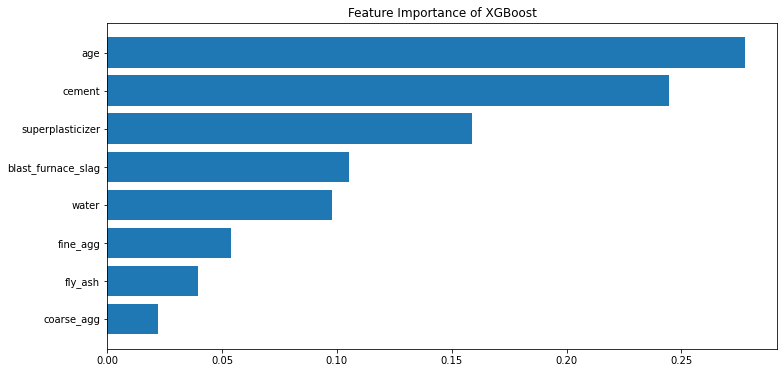

In [18]:
feature_importance = xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance of XGBoost")

Text(0.5, 1.0, 'Feature Importance of CatBoost')

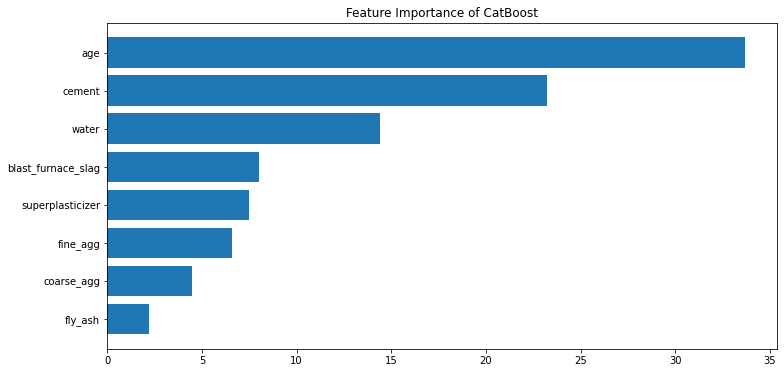

In [19]:
feature_importance = cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance of CatBoost")